### main code

In [15]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

def compute_iqr_from_csv(csv_file):
    df = pd.read_csv(csv_file)

    # Unnamed 컬럼 제거
    df = df.loc[:, ~df.columns.str.contains("Unnamed")]

    # 첫 컬럼이 문자열이면 제거
    if not pd.api.types.is_numeric_dtype(df.iloc[:, 0]):
        df = df.iloc[:, 1:]

    q1 = df["lower"].mean()
    q3 = df["upper"].mean()
    return q3 - q1

def collect_iqr(folder_path):
    records = []

    for csv in glob.glob(os.path.join(folder_path, "*.csv")):
        name = os.path.basename(csv).lower()

        metric = name.split("_")[0].lstrip("0123456789").upper()
        method = "Stable SMOTE" if "stable" in name else "SMOTE"

        iqr = compute_iqr_from_csv(csv)

        records.append({
            "Metric": metric,
            "Method": method,
            "IQR": iqr
        })

    return pd.DataFrame(records)

def plot_iqr_comparison(iqr_df):
    metrics = sorted(iqr_df["Metric"].unique())
    n_metrics = len(metrics)

    n_cols = 3
    n_rows = (n_metrics + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for idx, m in enumerate(metrics):
        ax = axes[idx]
        subset = iqr_df[iqr_df["Metric"] == m]

        ax.bar(subset["Method"], subset["IQR"])
        ax.set_title(f"IQR Comparison ({m})")
        ax.set_ylabel("IQR (Q3 - Q1)")
        ax.grid(axis="y", linestyle="--", alpha=0.5)

    # 남는 subplot 제거
    for idx in range(len(metrics), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()


def plot_from_folder(folder_path):
    iqr_df = collect_iqr(folder_path)
    plot_iqr_comparison(iqr_df)
    return iqr_df


### SVM

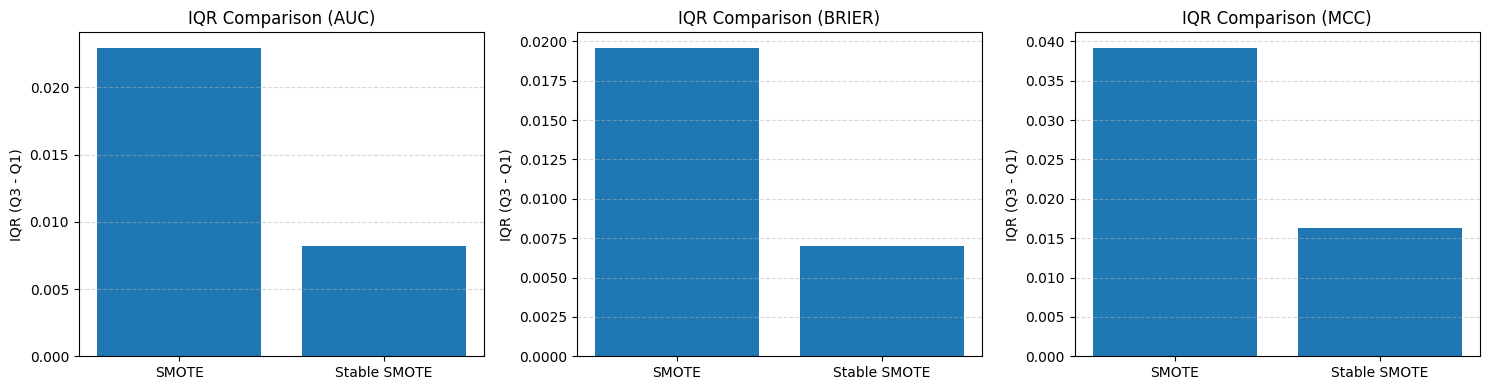

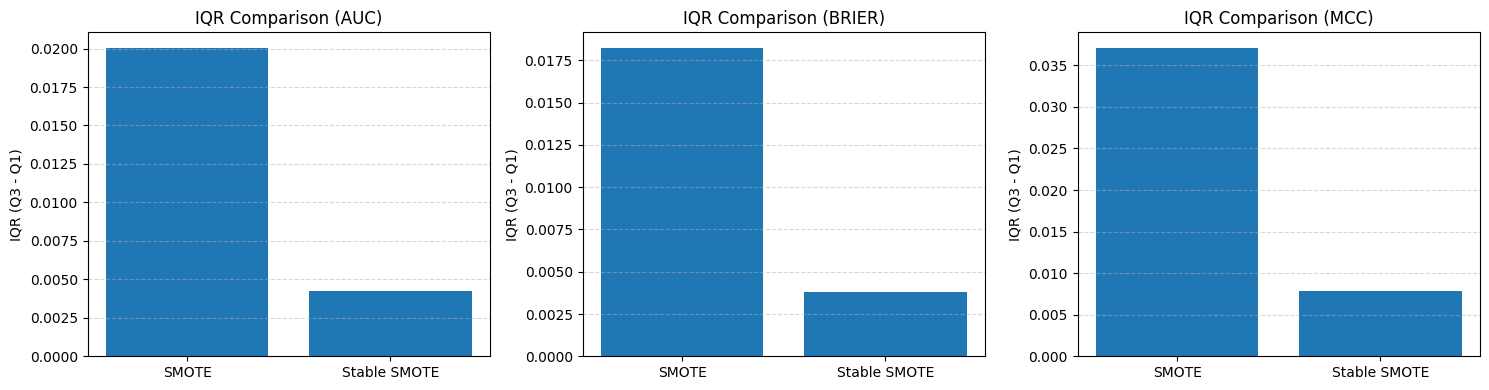

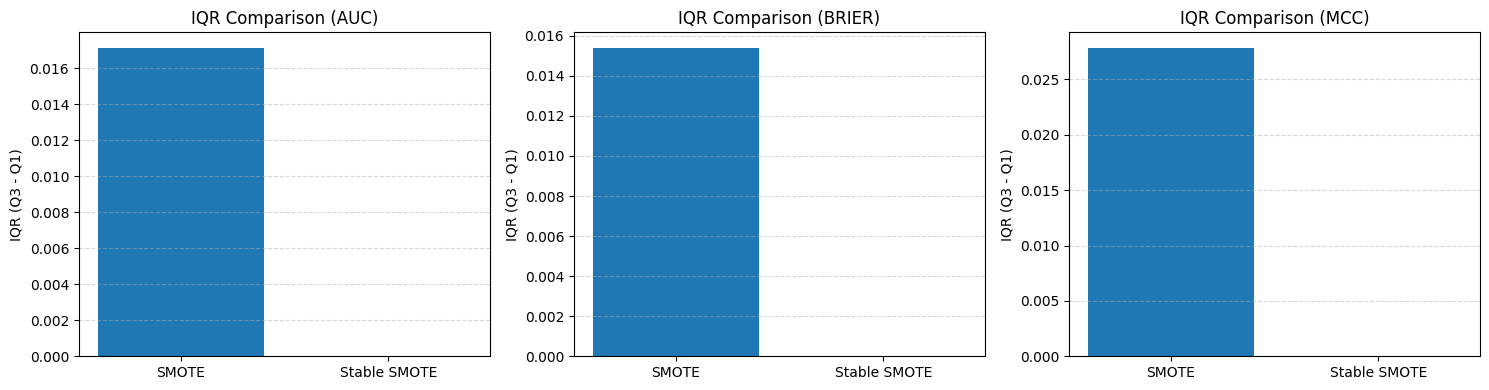

,Metric,Method,IQR
0,AUC,SMOTE,0.017130
1,AUC,Stable SMOTE,0.000000
2,BRIER,SMOTE,0.015400
3,BRIER,Stable SMOTE,0.000000
4,MCC,SMOTE,0.027867
5,MCC,Stable SMOTE,0.000000


In [20]:
plot_from_folder("AI_Team3_PJT-main/output_data/SMOTE_svm/")
plot_from_folder("AI_Team3_PJT-main/output_data/BORDERLINE_svm/")
plot_from_folder("AI_Team3_PJT-main/output_data/ADASYN_svm/")


### K-NN

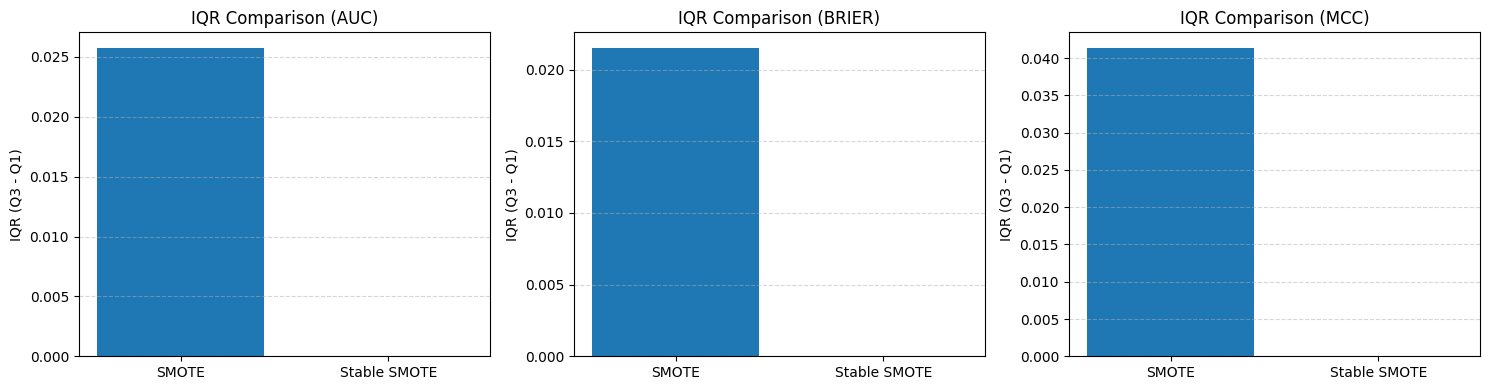

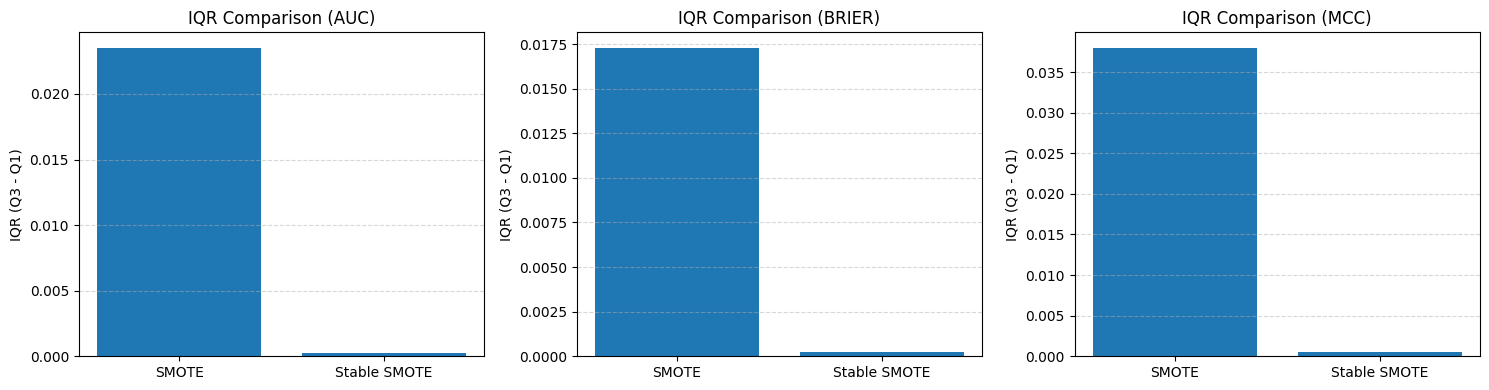

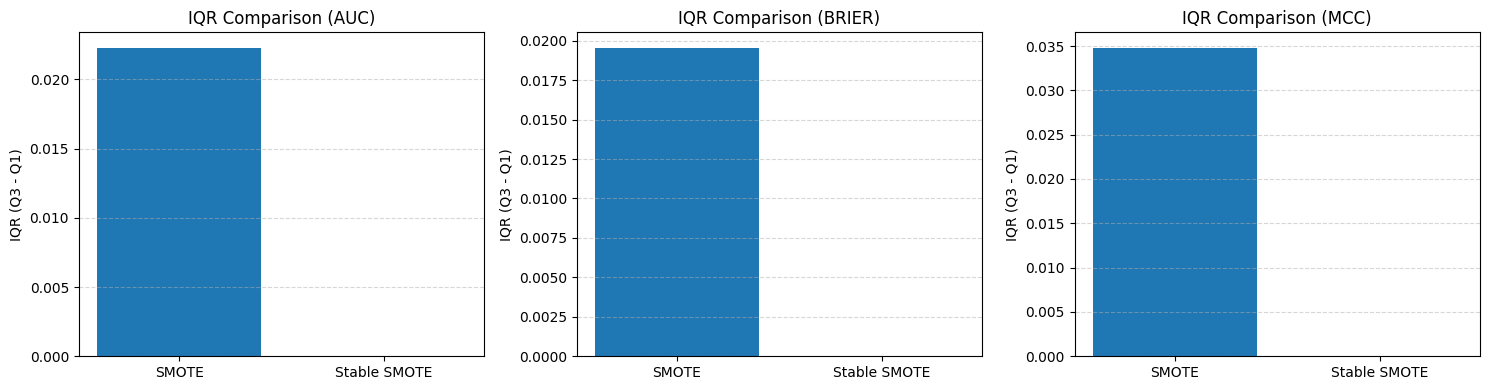

,Metric,Method,IQR
0,AUC,SMOTE,0.022288
1,AUC,Stable SMOTE,0.000000
2,BRIER,SMOTE,0.019550
3,BRIER,Stable SMOTE,0.000000
4,MCC,SMOTE,0.034805
5,MCC,Stable SMOTE,0.000000


In [21]:
plot_from_folder("AI_Team3_PJT-main/output_data/SMOTE_knn/")
plot_from_folder("AI_Team3_PJT-main/output_data/BORDERLINE_knn/")
plot_from_folder("AI_Team3_PJT-main/output_data/ADASYN_knn/")

### Decision Tree

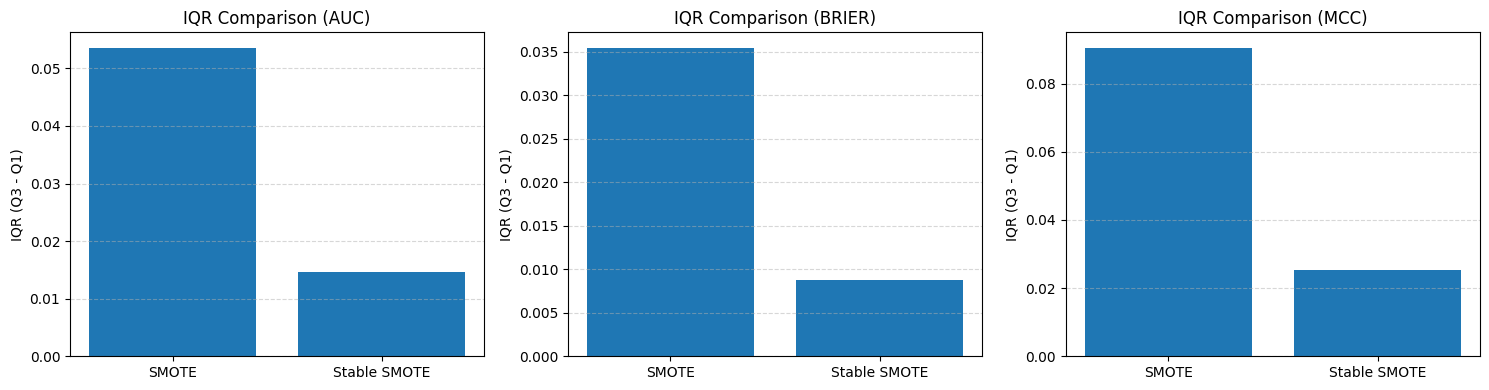

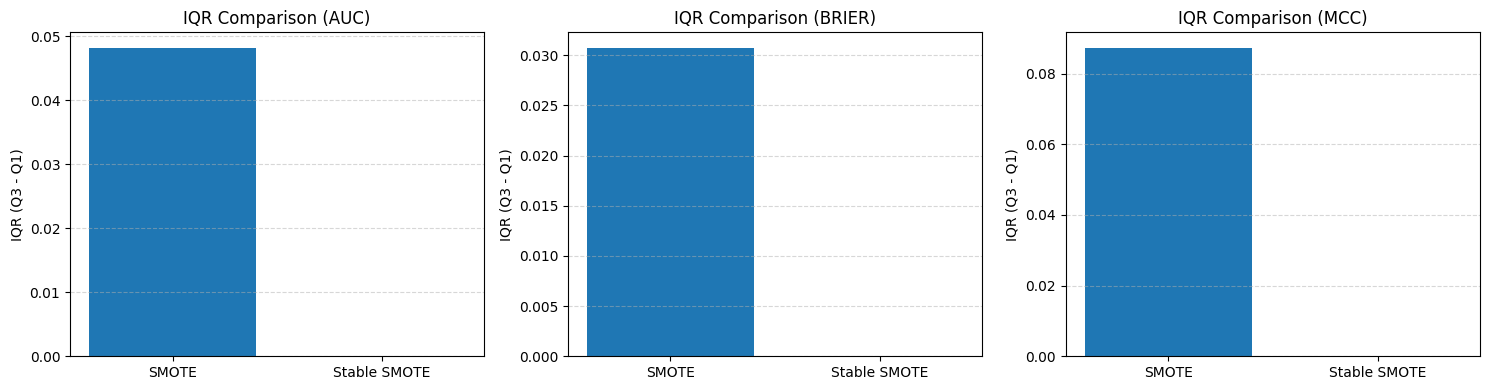

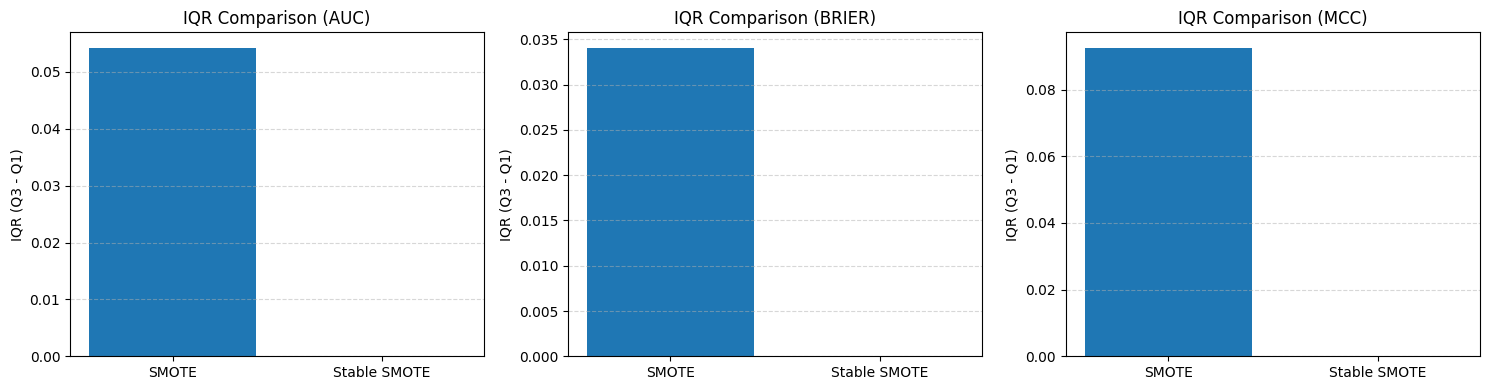

,Metric,Method,IQR
0,AUC,SMOTE,0.054249
1,AUC,Stable SMOTE,0.000000
2,BRIER,SMOTE,0.034071
3,BRIER,Stable SMOTE,0.000000
4,MCC,SMOTE,0.092541
5,MCC,Stable SMOTE,0.000000


In [22]:
plot_from_folder("AI_Team3_PJT-main/output_data/SMOTE_tree/")
plot_from_folder("AI_Team3_PJT-main/output_data/BORDERLINE_tree/")
plot_from_folder("AI_Team3_PJT-main/output_data/ADASYN_tree/")

### Random Forest

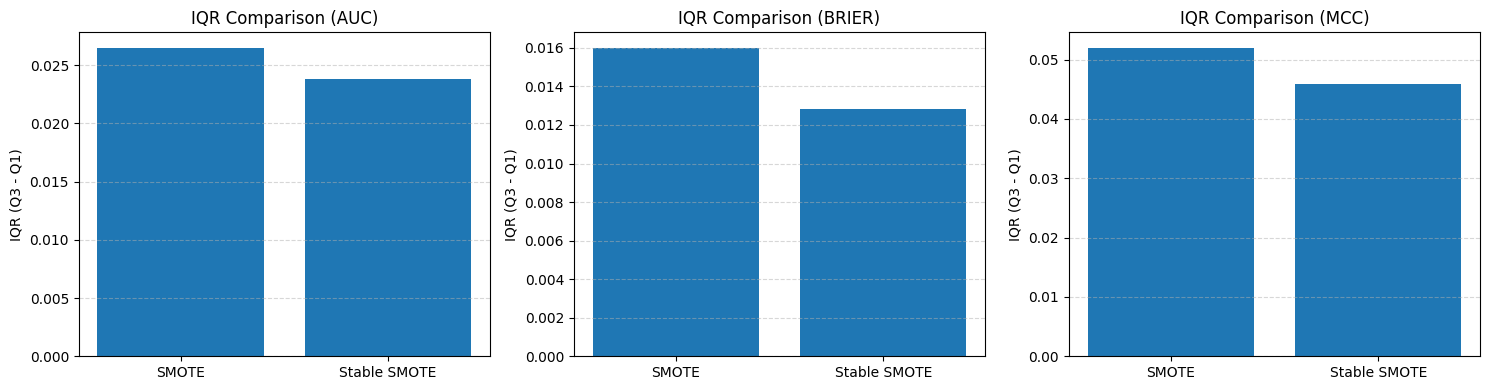

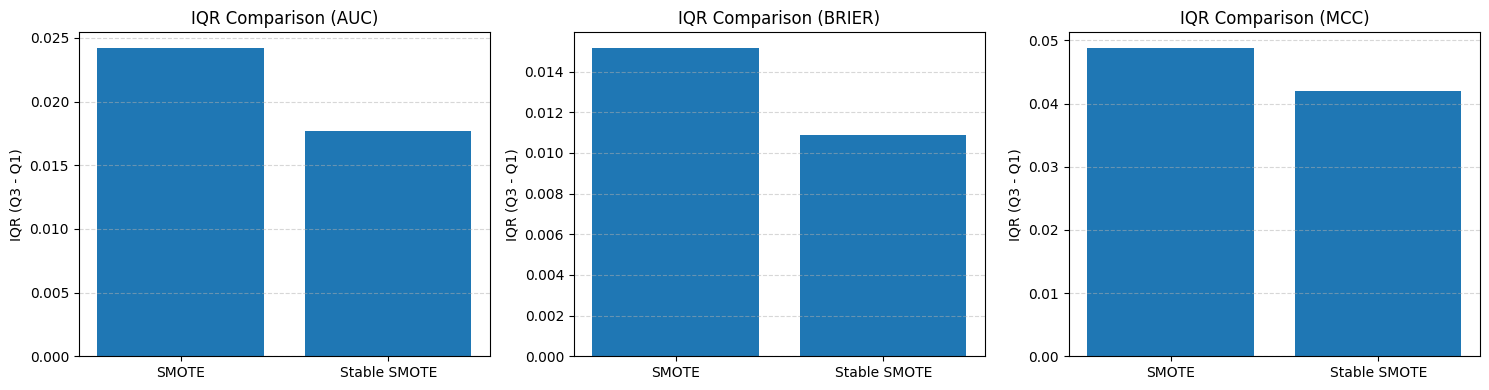

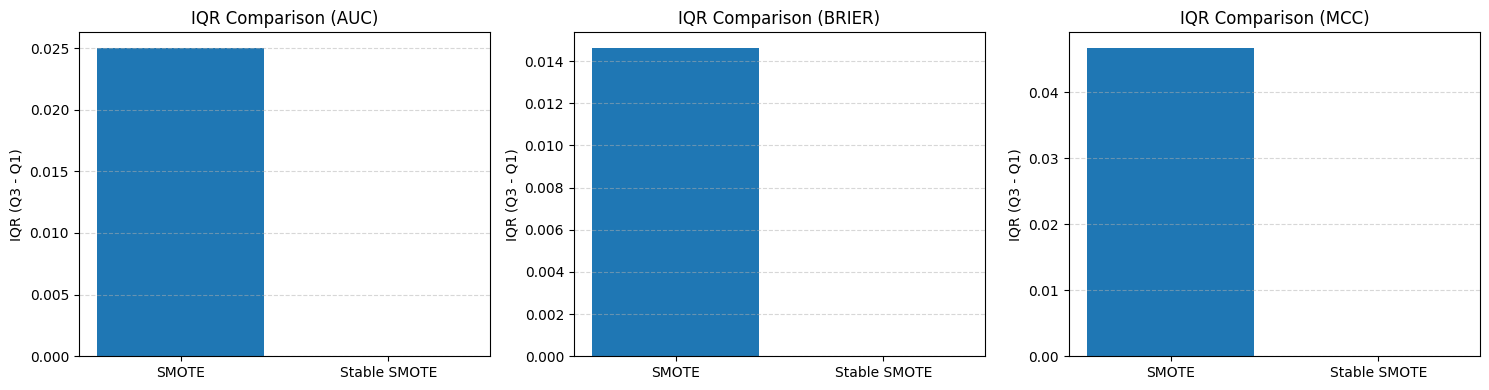

,Metric,Method,IQR
0,AUC,SMOTE,0.025020
1,AUC,Stable SMOTE,0.000000
2,BRIER,SMOTE,0.014635
3,BRIER,Stable SMOTE,0.000000
4,MCC,SMOTE,0.046711
5,MCC,Stable SMOTE,0.000000


In [23]:
plot_from_folder("AI_Team3_PJT-main/output_data/SMOTE_rf/")
plot_from_folder("AI_Team3_PJT-main/output_data/BORDERLINE_rf/")
plot_from_folder("AI_Team3_PJT-main/output_data/ADASYN_rf/")

## variance 전용 boxplot 코드

In [9]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

def collect_variance(folder_path):
    records = []

    for csv in glob.glob(os.path.join(folder_path, "*.csv")):
        df = pd.read_csv(csv)
        df = df.loc[:, ~df.columns.str.contains("Unnamed")]

        if "variance" not in df.columns:
            continue

        name = os.path.basename(csv).lower()
        metric = name.split("_")[0].lstrip("0123456789").upper()
        method = "Stable SMOTE" if "stable" in name else "SMOTE"

        for v in df["variance"].dropna():
            records.append({
                "Metric": metric,
                "Method": method,
                "Variance": v
            })

    return pd.DataFrame(records)

def plot_variance_boxplot(var_df):
    metrics = sorted(var_df["Metric"].unique())
    n_metrics = len(metrics)

    n_cols = 3
    n_rows = (n_metrics + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for idx, m in enumerate(metrics):
        ax = axes[idx]
        subset = var_df[var_df["Metric"] == m]

        data = [
            subset[subset["Method"] == "SMOTE"]["Variance"],
            subset[subset["Method"] == "Stable SMOTE"]["Variance"]
        ]

        ax.boxplot(data, labels=["SMOTE", "Stable SMOTE"])
        ax.set_title(f"Variance Distribution ({m})")
        ax.set_ylabel("Variance")
        ax.grid(axis="y", linestyle="--", alpha=0.5)

    # 남는 subplot 제거
    for idx in range(len(metrics), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()


### SVM

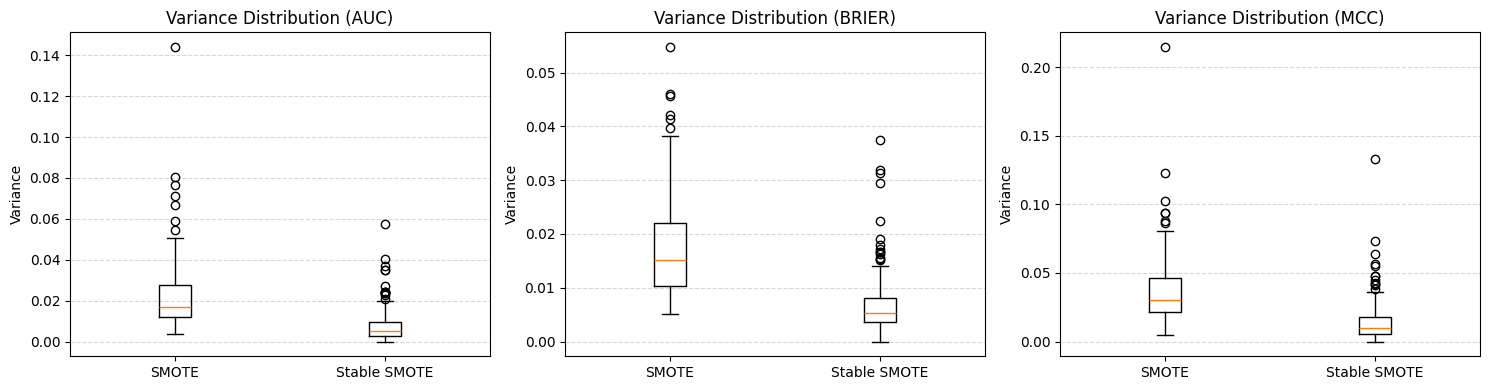

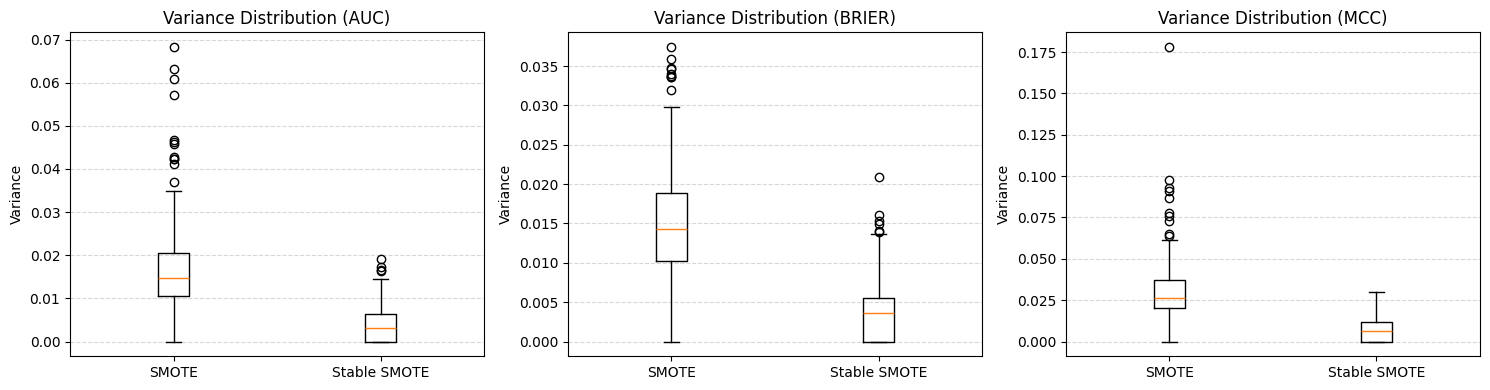

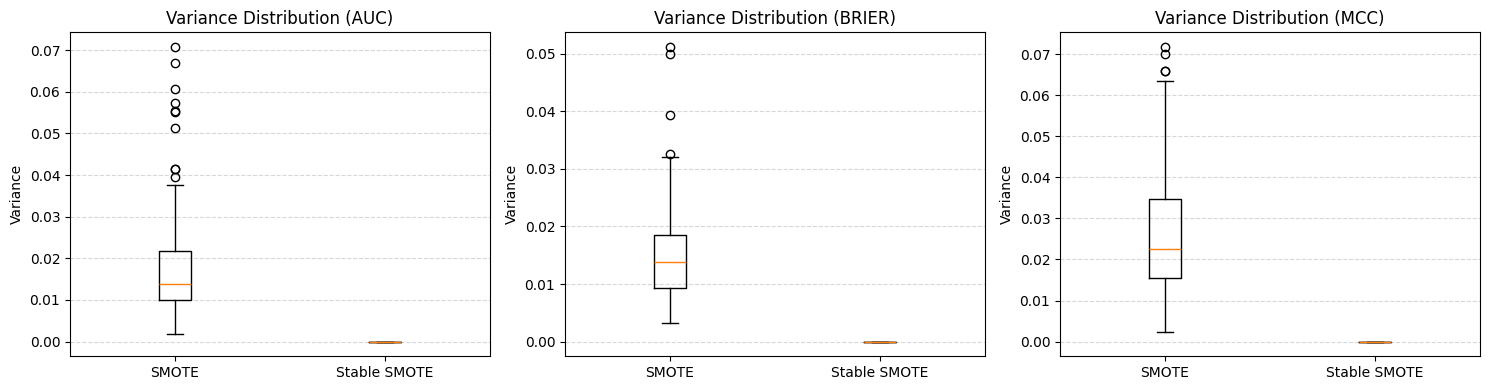

In [10]:
for folder_path in [
    "AI_Team3_PJT-main/output_data/SMOTE_svm/",
    "AI_Team3_PJT-main/output_data/BORDERLINE_svm/",
    "AI_Team3_PJT-main/output_data/ADASYN_svm/"
]:
    var_df = collect_variance(folder_path)
    plot_variance_boxplot(var_df)


### K-NN

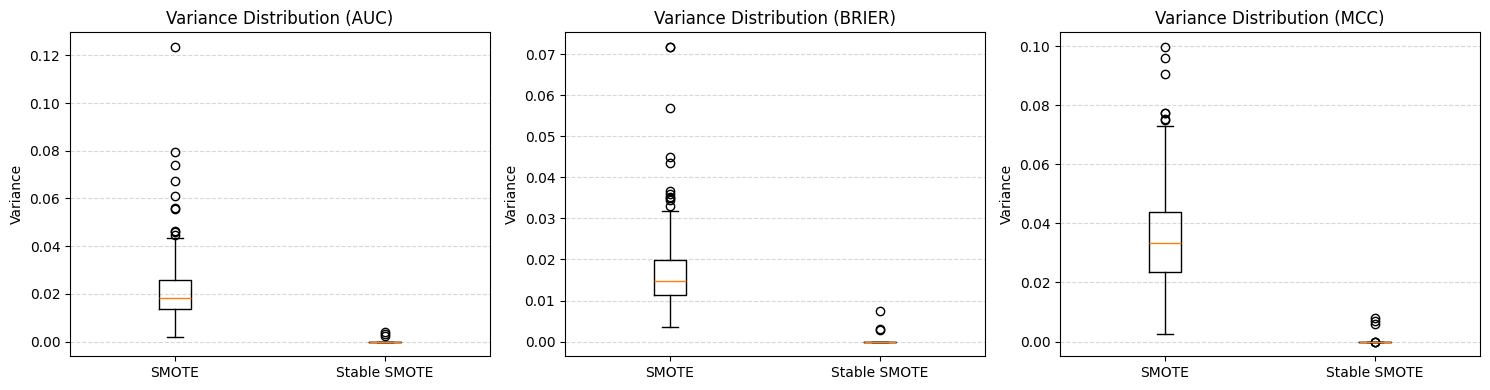

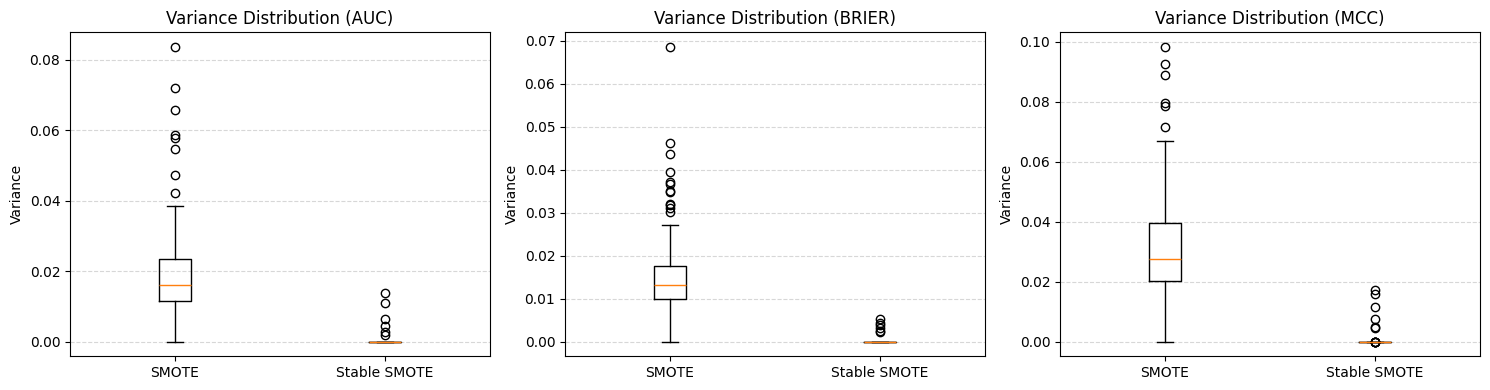

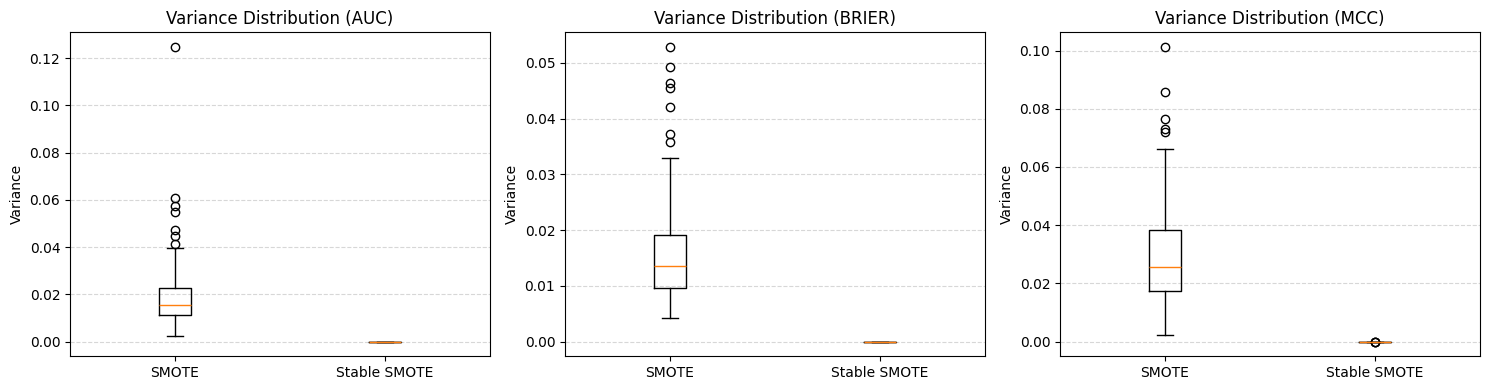

In [11]:
for folder_path in [
    "AI_Team3_PJT-main/output_data/SMOTE_knn/",
    "AI_Team3_PJT-main/output_data/BORDERLINE_knn/",
    "AI_Team3_PJT-main/output_data/ADASYN_knn/"
]:
    var_df = collect_variance(folder_path)
    plot_variance_boxplot(var_df)


### Decision Tree

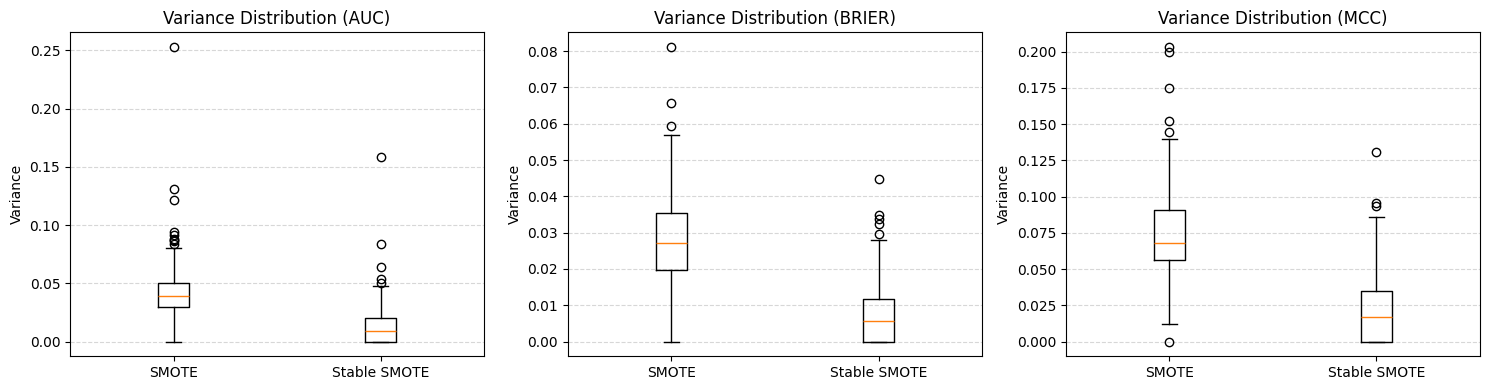

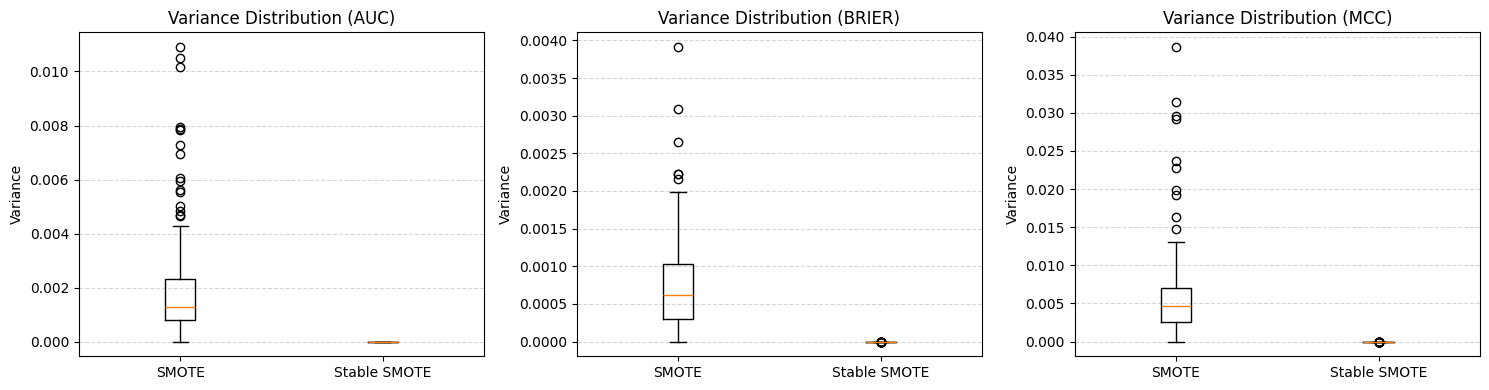

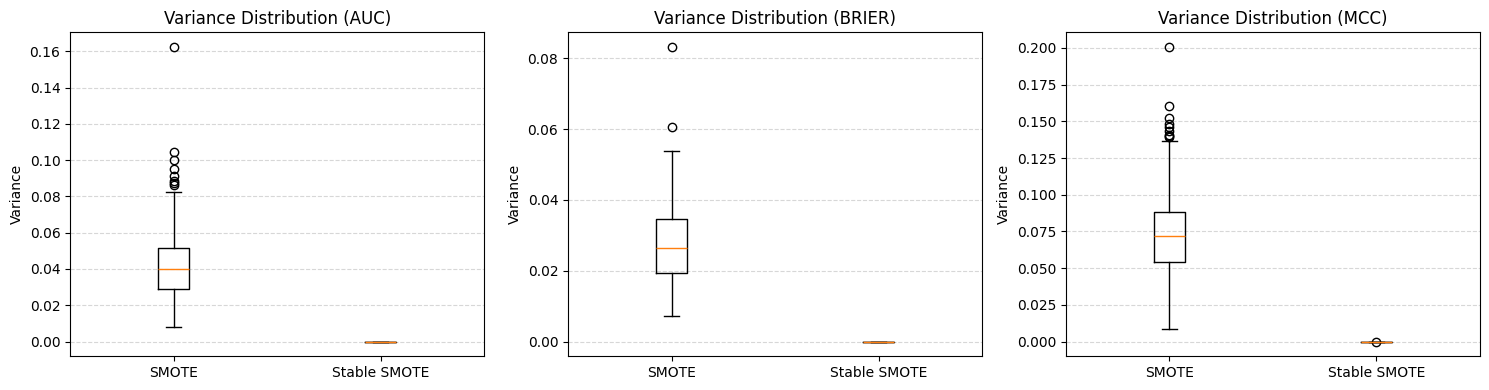

In [12]:
for folder_path in [
    "AI_Team3_PJT-main/output_data/SMOTE_tree/",
    "AI_Team3_PJT-main/output_data/BORDERLINE_tree/",
    "AI_Team3_PJT-main/output_data/ADASYN_tree/"
]:
    var_df = collect_variance(folder_path)
    plot_variance_boxplot(var_df)


### Random Foreset

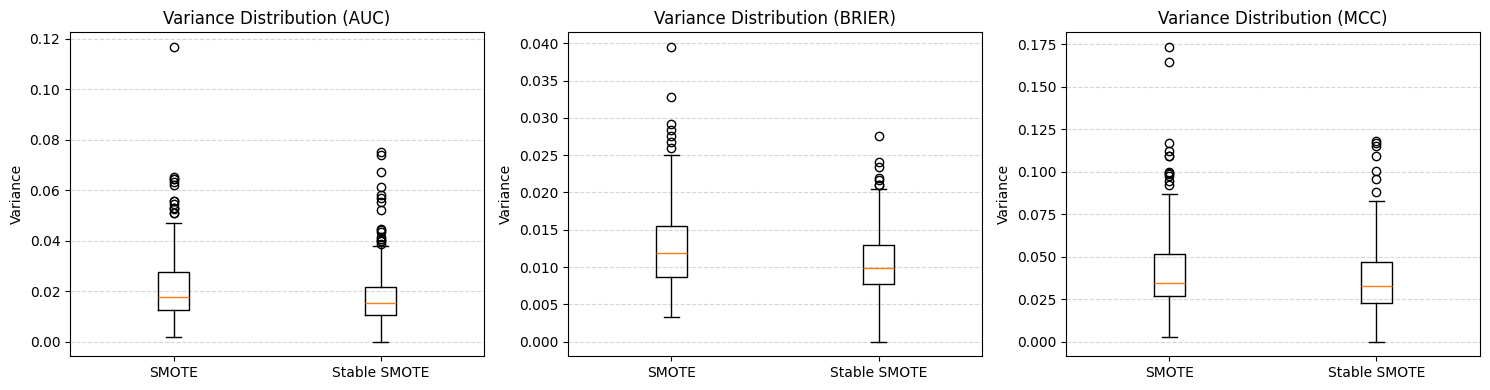

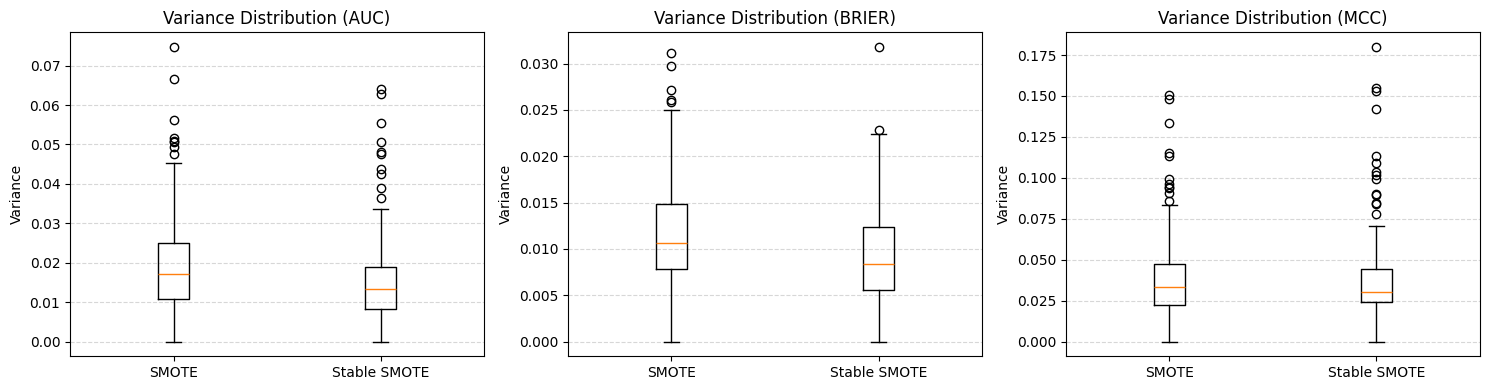

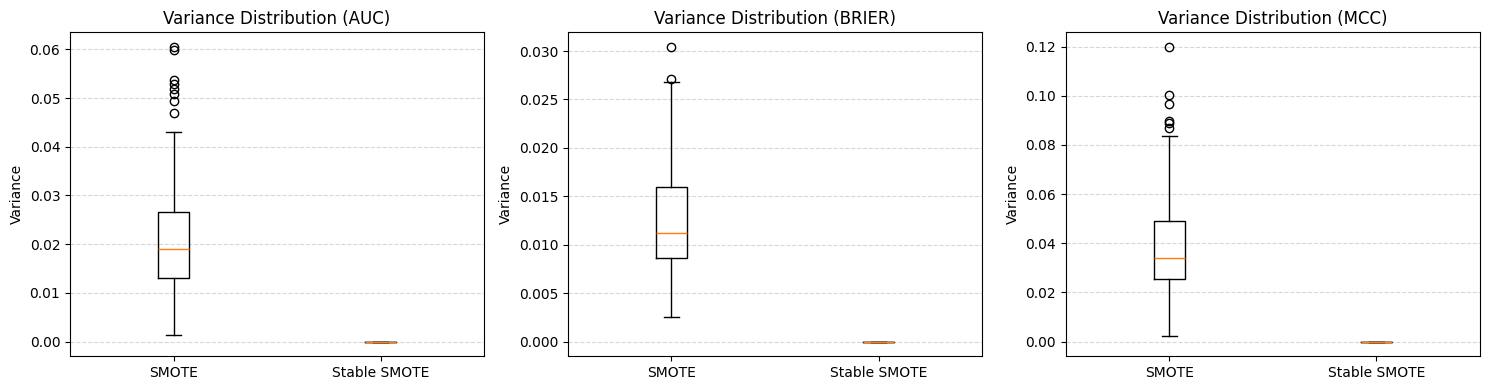

In [13]:
for folder_path in [
    "AI_Team3_PJT-main/output_data/SMOTE_rf/",
    "AI_Team3_PJT-main/output_data/BORDERLINE_rf/",
    "AI_Team3_PJT-main/output_data/ADASYN_rf/"
]:
    var_df = collect_variance(folder_path)
    plot_variance_boxplot(var_df)
